In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

path = ""

In [3]:
# Basic Stuff
import pandas as pd
import numpy as np
from scipy import stats
from itertools import combinations

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Matplotlib parameters customization

fig_color = (150/255, 24/255, 24/255, 1)
def set_mpl_params(COLOR = 'black'):  
  mpl.rcParams['text.color'] = COLOR
  mpl.rcParams['font.weight'] = 'normal'
  mpl.rcParams['figure.titleweight'] = 'normal'
  mpl.rcParams['axes.labelcolor'] = COLOR
  mpl.rcParams['axes.edgecolor'] = COLOR
  mpl.rcParams['xtick.color'] = COLOR
  mpl.rcParams['ytick.color'] = COLOR
  mpl.rcParams['figure.facecolor'] = (1,1,1,0)
  mpl.rcParams['savefig.facecolor'] = (0,0,0,0)
  mpl.rcParams['savefig.transparent'] = False

# Importing and cleaning the data

In [5]:
# Load Data and keep year from release date

data = pd.read_csv(path + "../data/movie_data_imdbscores_final.csv")

data.head()

,movie_id,movie_name,release_date,english_language,german_language,silent_film_language,spanish_language,japanese_language,italian_language,tamil_language,...,united_kingdom,germany,japan,france,italy,india,plot_summary,F_gender,averageRating,numVotes
0,975900,ghosts of mars,2001,True,False,False,False,False,False,False,...,False,False,False,False,False,False,"Set in the second half of the 22nd century, th...",0.352941,4.9,55254
1,9363483,white of the eye,1987,True,False,False,False,False,False,False,...,True,False,False,False,False,False,A series of murders of rich young women throug...,0.500000,6.1,2631
2,261236,a woman in flames,1983,False,True,False,False,False,False,False,...,False,True,False,False,False,False,"Eva, an upper class housewife, becomes frustra...",0.333333,6.0,590
3,18998739,the sorcerer's apprentice,2002,True,False,False,False,False,False,False,...,False,False,False,False,False,False,"Every hundred years, the evil Morgana returns...",0.200000,6.5,160
4,12621957,the sorcerer's apprentice,2010,True,False,False,False,False,False,False,...,False,False,False,False,False,False,"In AD 740, one of Merlin's three apprentices...",0.312500,6.5,160


# Basic plotting and discretization of ratings

In [6]:
set_mpl_params('white')

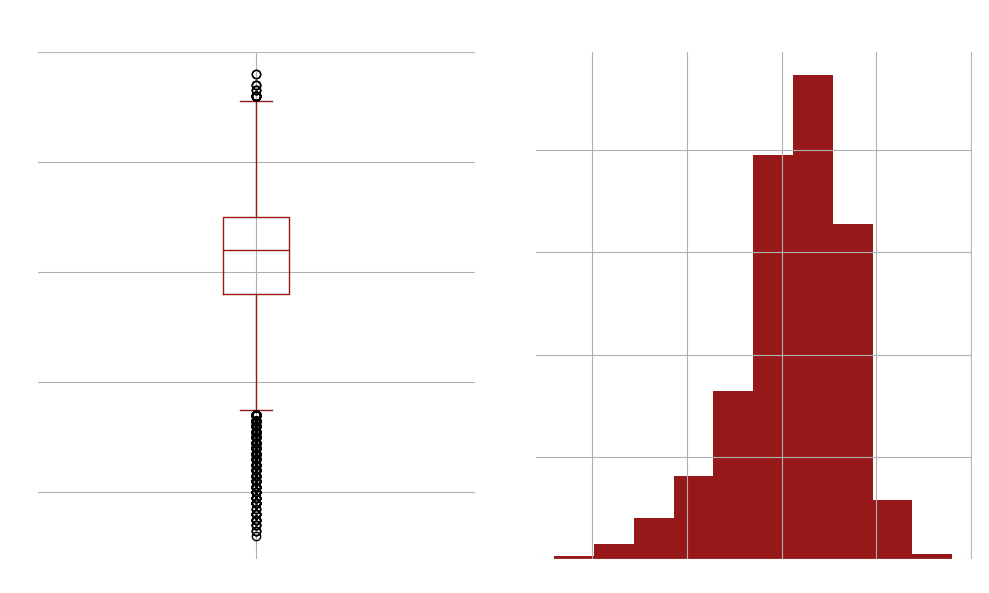

In [15]:
# Plot averageRating distribution

fig, ax = plt.subplots(1, 2, figsize = (10,6), dpi = 100)
ax = ax.flatten()
data.averageRating.plot.box(ax = ax[0], color= fig_color, grid = True)
data.averageRating.hist(ax = ax[1], color = fig_color)
fig.suptitle("averageRating distribution")
plt.tight_layout()
plt.savefig(path + '../figs/averageRating_distribution.png')
plt.show()

In [8]:
data.averageRating.describe()

count    31291.000000
mean         6.236113
std          1.164524
min          1.200000
25%          5.600000
50%          6.400000
75%          7.000000
max          9.600000
Name: averageRating, dtype: float64

In [9]:
# Discretize feature based on quantiles
def discretize_column(data, n, label_suffix = "_star"):
    
    # Compute proportion for quantile
    p = 1/(n)
    
    # Return semgments
    return pd.cut(data,
                  # Create interval cuts
                  bins = [np.quantile(data, x * p) if x != n else np.inf
                          for x in range(n+1)],
                  right = False,
                  # assign labels
                  labels = [f"{i+1}{label_suffix}" for i in range(n)])

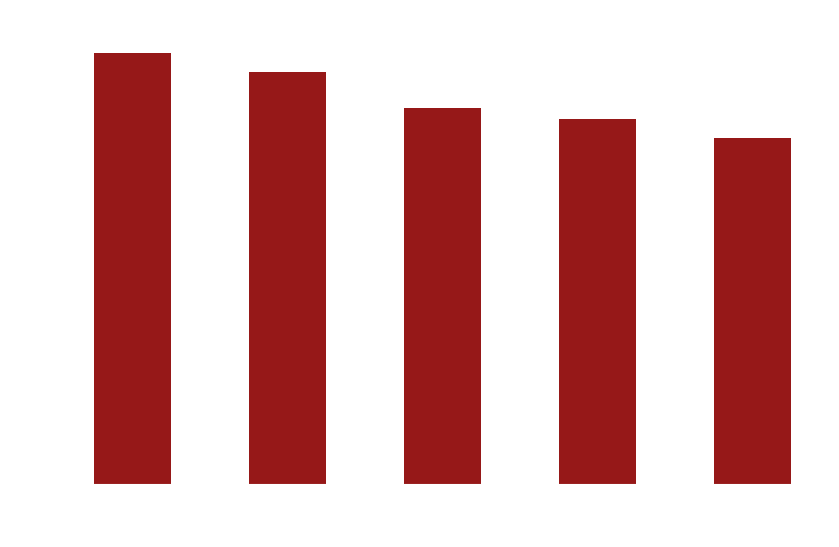

In [17]:
# Perform discretization and save categories in new feature
data["score_discretized"] = discretize_column(data.averageRating, 5)


plt.figure(figsize = (10,6), dpi = 100)
# Verify Discretization proportions
data.score_discretized.value_counts().plot.bar(color = fig_color)
plt.title("Number of movies per categories")
plt.savefig(path + '../figs/score_discretization_distribution.png')
plt.show()

In [18]:
# Compute mean proportions and means for numeric values
grouped = data.groupby('score_discretized')
grouped_means = grouped.mean()
grouped_means

,movie_id,release_date,english_language,german_language,silent_film_language,spanish_language,japanese_language,italian_language,tamil_language,hindi_language,...,united_states_of_america,united_kingdom,germany,japan,france,italy,india,F_gender,averageRating,numVotes
score_discretized,,,,,,,,,,,,,,,,,,,,,
1_star,1.534376e+07,1992.321786,0.680512,0.011492,0.007716,0.021835,0.017895,0.021507,0.023149,0.069775,...,0.618453,0.075521,0.029716,0.019865,0.030209,0.030701,0.122147,0.342841,4.420440,3534.902972
2_star,1.406119e+07,1984.500802,0.716907,0.015322,0.010511,0.029396,0.021379,0.020666,0.017103,0.045608,...,0.621058,0.109745,0.033672,0.022448,0.039907,0.026367,0.079280,0.343848,5.727258,6468.271869
3_star,1.323335e+07,1981.038682,0.706250,0.018750,0.014189,0.034966,0.028716,0.023818,0.015372,0.040878,...,0.599493,0.122466,0.030912,0.026858,0.054561,0.027703,0.073480,0.342836,6.304020,9307.742230
4_star,1.200842e+07,1980.180269,0.652778,0.033219,0.019903,0.044387,0.031357,0.030212,0.017039,0.051833,...,0.534507,0.116266,0.040521,0.036082,0.071019,0.032932,0.094215,0.334763,6.842511,13110.968499
5_star,1.095490e+07,1982.277271,0.559479,0.043693,0.015562,0.043094,0.043992,0.035613,0.036810,0.068233,...,0.449499,0.102798,0.046686,0.045040,0.078258,0.039054,0.168637,0.317061,7.624465,43490.467455


In [19]:
# Visualize the best and worst scoring groups

grouped_means.iloc[[0,-1], :]

,movie_id,release_date,english_language,german_language,silent_film_language,spanish_language,japanese_language,italian_language,tamil_language,hindi_language,...,united_states_of_america,united_kingdom,germany,japan,france,italy,india,F_gender,averageRating,numVotes
score_discretized,,,,,,,,,,,,,,,,,,,,,
1_star,1.534376e+07,1992.321786,0.680512,0.011492,0.007716,0.021835,0.017895,0.021507,0.023149,0.069775,...,0.618453,0.075521,0.029716,0.019865,0.030209,0.030701,0.122147,0.342841,4.420440,3534.902972
5_star,1.095490e+07,1982.277271,0.559479,0.043693,0.015562,0.043094,0.043992,0.035613,0.036810,0.068233,...,0.449499,0.102798,0.046686,0.045040,0.078258,0.039054,0.168637,0.317061,7.624465,43490.467455


# Statistical analysis
As we focus on the upper extreme of the most successful movies, we split the data into movies with the very highest ratings (5-star) and the rest. We will use a standardised version of the dataset for comparing mean differences between features, whereas the non-standarized version will be used for analysis of a single feature, as it is more interpretable.

In [20]:
def one_vs_all_encode(x, th):
    return np.where(x >= th, '5_star', 'other')

data['rating'] = one_vs_all_encode(data['score_discretized'] == '5_star', 0.5)
stat_data = data.drop(['score_discretized', 'averageRating', 'numVotes', 'rating', 'movie_name','plot_summary'], axis = 1).astype(float)
stat_data_std = (stat_data - stat_data.mean(axis = 0)) / stat_data.std(axis = 0)

stat_data = pd.merge(stat_data, data['rating'], left_index=True, right_index=True)
stat_data_std = pd.merge(stat_data_std, data['rating'], left_index=True, right_index=True)

In [21]:
stat_data_std

,movie_id,release_date,english_language,german_language,silent_film_language,spanish_language,japanese_language,italian_language,tamil_language,hindi_language,...,Documentary,united_states_of_america,united_kingdom,germany,japan,france,italy,india,F_gender,rating
0,-1.138587,0.695032,0.717937,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,0.885469,-0.343353,-0.195151,-0.177808,-0.243388,-0.180752,-0.349659,0.077510,other
1,-0.346499,0.125034,0.717937,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,-1.129308,2.912362,-0.195151,-0.177808,-0.243388,-0.180752,-0.349659,0.739083,other
2,-1.206077,-0.037823,-1.392836,6.209473,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,-1.129308,-0.343353,5.124074,-0.177808,-0.243388,-0.180752,-0.349659,-0.010700,other
3,0.563414,0.735746,0.717937,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,-1.129308,-0.343353,-0.195151,-0.177808,-0.243388,-0.180752,-0.349659,-0.610526,other
4,-0.038782,1.061460,0.717937,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,0.885469,-0.343353,-0.195151,-0.177808,-0.243388,-0.180752,-0.349659,-0.104423,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31286,-1.168041,0.369319,-1.392836,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,0.885469,-0.343353,-0.195151,-0.177808,-0.243388,-0.180752,-0.349659,0.176746,other
31287,-0.865429,0.776460,-1.392836,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,-1.129308,-0.343353,-0.195151,-0.177808,-0.243388,-0.180752,-0.349659,-0.010700,other
31288,0.223087,0.410033,-1.392836,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,4.119765,...,-0.099539,-1.129308,-0.343353,-0.195151,-0.177808,-0.243388,-0.180752,2.859839,-0.224923,other
31289,1.021715,-1.747818,0.717937,-0.161039,-0.118455,-0.191145,-0.173262,-0.165781,-0.150492,-0.242725,...,-0.099539,-1.129308,2.912362,-0.195151,-0.177808,-0.243388,-0.180752,-0.349659,0.125624,other


In [22]:
grouped = stat_data_std.set_index('movie_id').groupby('rating')

## T-tests and p-values
As we are doing multiple comparisons, we need to correct the p-values accordingly. However as we cannot assume the features to be statistically independent, we use Bonferroni correction which is more conservative than Sidak.

In [23]:
# test features over dataframe with significance sidak correction
def test_over_variables(n_tests, vars, alpha, t1, t2):

    # Success flag:
    # At least one significant outcome -> underlying effect
    success = False
    
    #List to append significant results
    successes = []
    
    # Save pvalues
    pvalues = []

    print("_____________________________")
    print(f"{n_tests} t-tests with significance: {alpha:0.5f}")

    for var in vars:
        # Test var in both periods of time
        test_result = stats.ttest_ind(t1[var], t2[var])
        
        # If the result is significant...
        if test_result.pvalue < alpha:
            # Flag success true and keep result for future display
            success = True
            successes.append((var, test_result.pvalue))
        
        #print(f't-Test for Var: {var} -> p: {test_result[1]}')
        pvalues.append(test_result.pvalue)
    print("_____________________________")


    # Display significant results
    if success:
        print("Manifestation of underlying effect between groups in vars:")
        for var in successes:
            print(f"{var[0]} -> pvalue: {var[1]}")

    print(f"{len(successes)} / {len(vars)} significative results")
    
    return pvalues

def tester(grouped, grouped_on, alpha, correction = 'sidak', subtype = "by_group"):

  df_list = []

  total_tests = sum([len(df.columns.drop(grouped_on)) for (_, df) in grouped])

  # Iterate on all comparison combinations
  for (label_1,df_1), (label_2, df_2) in combinations(grouped, 2):
      
      # Drop the separating feature
      vars = df_1.columns.drop(grouped_on)
      
      print(">>>>>>>>>>>>>>>>>>>>>>>>>>")
          
      print(f"{label_1} vs {label_2}")

      # Test over all variables with 0.05 significance
      # Make p test adjustment based on number of experiments

      n_tests = len(vars)

      if subtype == 'by_group': # independece by group comparison
        k = n_tests
      else: # independence by all comparisons of groups
        k = total_tests


      if correction == 'sidak':
        # Sidak correction with k = n_tests
        alpha_c = 1 - (1 - alpha)**(1/k)
      else:
        # Bonferroni correction
        alpha_c = alpha / k

      

      pvalues = test_over_variables(n_tests, vars, alpha_c, df_1, df_2)
      
      
      # Save results
      df_list.append(pd.DataFrame([pvalues], index = [f"{label_1}_vs_{label_2}"], columns = vars))
      

  # Append al results
  comparison_df = pd.concat(df_list, axis = 0)

  return comparison_df

In [24]:
test_results = tester(grouped, 'rating', 0.05, correction = 'bonferroni', subtype = 'by_experiment')

>>>>>>>>>>>>>>>>>>>>>>>>>>
5_star vs other
_____________________________
39 t-tests with significance: 0.00064
_____________________________
Manifestation of underlying effect between groups in vars:
release_date -> pvalue: 5.610457231843586e-10
english_language -> pvalue: 1.7540050395146672e-85
german_language -> pvalue: 2.656213966637664e-27
spanish_language -> pvalue: 8.79002699590302e-05
japanese_language -> pvalue: 3.950590425348032e-16
italian_language -> pvalue: 4.082472246696117e-07
tamil_language -> pvalue: 3.895424484145731e-20
hindi_language -> pvalue: 4.071868922093976e-07
malayalam_language -> pvalue: 1.190153297626772e-10
french_language -> pvalue: 1.7122202829155277e-27
Action -> pvalue: 1.9207140882829139e-28
Adventure -> pvalue: 5.063363819548512e-09
Horror -> pvalue: 5.943461371489801e-72
Thriller -> pvalue: 2.0003011813193935e-10
Drama -> pvalue: 1.0319222445383303e-91
Black_and_white -> pvalue: 1.8186680347997783e-25
Comedy -> pvalue: 1.241807582296114e-11
Indie -> 

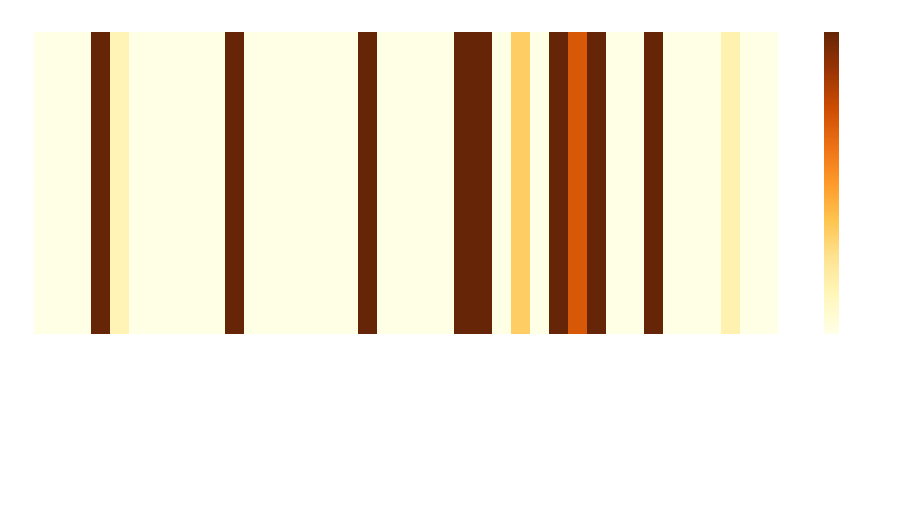

In [26]:
plt.figure(figsize = (12, 4), dpi = 100)
sns.heatmap(test_results, cmap = "YlOrBr", vmin = 0, vmax = 0.0006)
plt.title("t-test p value")
plt.savefig(path + '../figs/t-test_5star.png')
plt.show()

We find that all of the 31/39 features are statistically significant, which is unsurprising given their nature. However as this is unhelpful our analysis we sort the features by lowest p-value.

In [27]:
test_results.T.sort_values('5_star_vs_other').head(10)

,5_star_vs_other
united_states_of_america,4.371200e-95
Drama,1.031922e-91
english_language,1.754005e-85
Horror,5.943461e-72
india,3.866682e-70
World_cinema,1.441300e-66
Short_Film,9.942822e-53
Documentary,9.457991e-47
Action,1.920714e-28
french_language,1.712220e-27


This already gives us some indication as to which features have a large influence on the rating, however we do not learn anything about the magnitude or the positive/negative nature of the effect. To get this information we evaluate the mean differences on standardized data.

In [28]:
                # 5 star
mean_diff = grouped.mean().iloc[0] - grouped.mean().iloc[1]

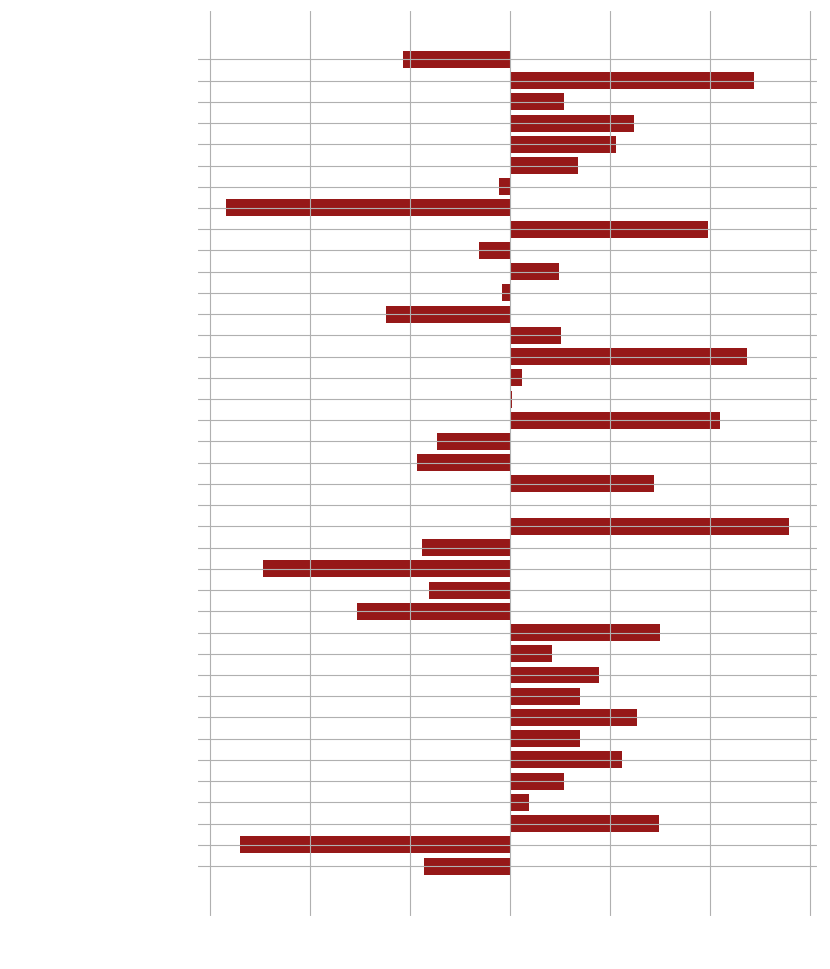

In [30]:
plt.figure(figsize= (8,12), dpi = 100)
plt.barh(range(len(mean_diff)), mean_diff, color = fig_color)
plt.yticks(range(len(mean_diff)), labels = mean_diff.index)
plt.grid()
plt.xlabel([-0.3,0.3])
plt.savefig(path + '../figs/mean_differences_5star.png')
plt.show()

### Side tangent: gender bias
It appears that movies with the highest ratings have a non-negligeable gender bias, i.e. the cast includes a lower proportion of women. To confirm this we compare the bootstrapped confidence intervals of the non-standardized gender proportion data for 5-star and non-5-star movies.

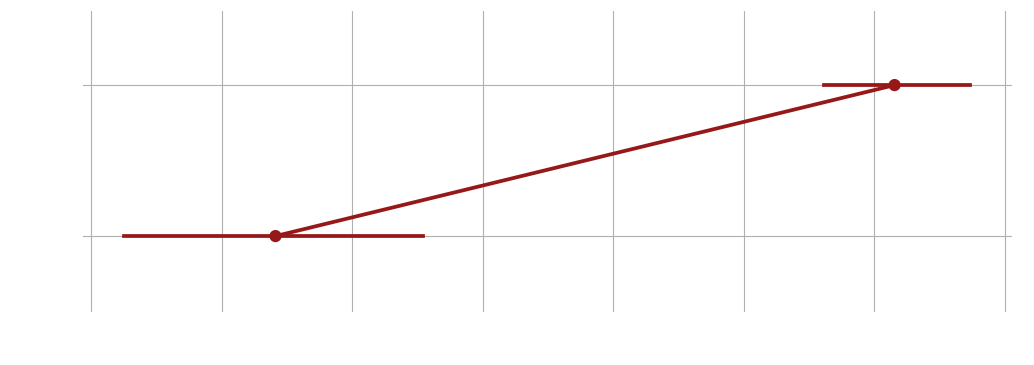

In [31]:
plt.figure(figsize = (12, 4), dpi = 100)
sns.pointplot(data=stat_data, y="rating", x="F_gender", color = fig_color)
plt.savefig(path + '../figs/gender_bias.png')
plt.grid()

There seems to be indeed a noticeable bias of approximately 3 percentage points in the most critically acclaimed movies.

Let us now find the 5 most helpful and unhelpful features.

In [32]:
mean_diff.sort_values(ascending=False).head(5)

Drama           0.279250
india           0.243610
World_cinema    0.237185
Short_Film      0.210422
Documentary     0.197735
dtype: float64

In [33]:
mean_diff.sort_values(ascending=True).head(5)

united_states_of_america   -0.284412
english_language           -0.269451
Horror                     -0.246807
Action                     -0.152440
Action/Adventure           -0.123443
dtype: float64

### Effect of language
As making the movie in english seems to be the worst choice possible, let us first examine the effect of language with English and French.

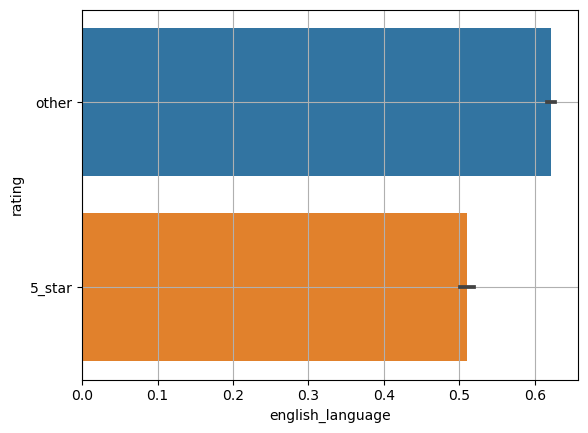

In [111]:
sns.barplot(data=stat_data, y="rating", x="english_language")
plt.grid()

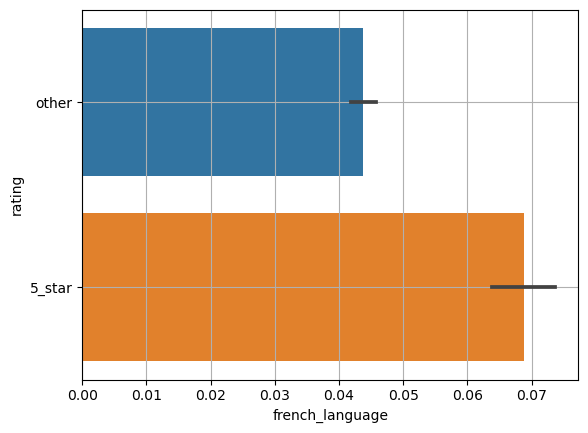

In [110]:
sns.barplot(data=stat_data, y="rating", x="french_language")
plt.grid()

Our results suggest that movies in French instead of English have a much higher likelihood to receive critical acclaim

### Effect of genre
As we wish to make the most IMDB-successful movie possible, we will focus on the 4 most positively correlated genres.

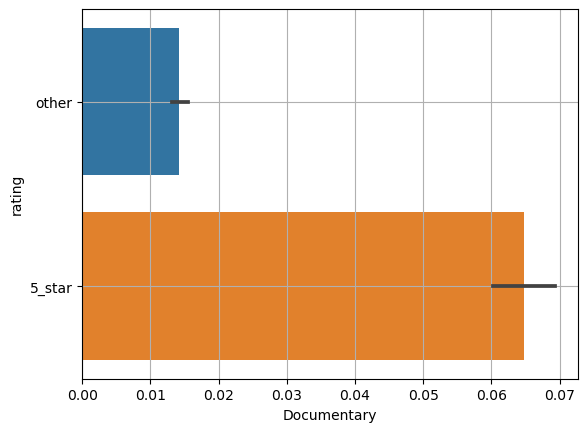

In [112]:
sns.barplot(data=stat_data, y="rating", x="Documentary")
plt.grid()

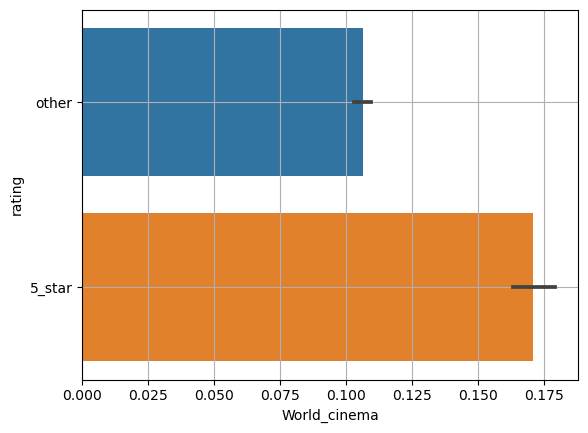

In [113]:
sns.barplot(data=stat_data, y="rating", x="World_cinema")
plt.grid()

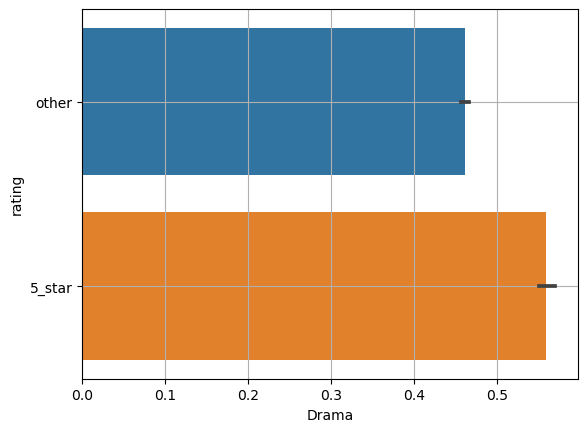

In [116]:
sns.barplot(data=stat_data, y="rating", x="Drama")
plt.grid()

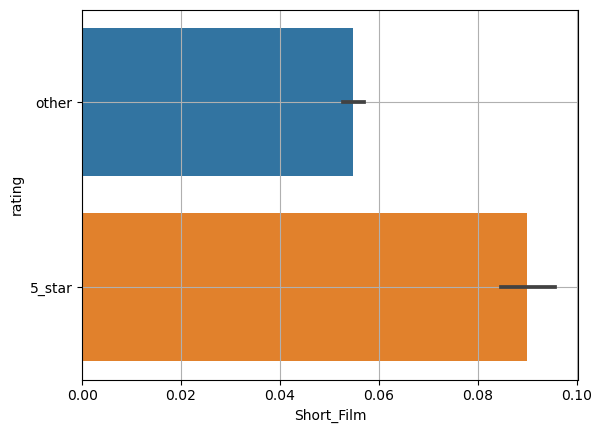

In [118]:
sns.barplot(data=stat_data, y="rating", x="Short_Film")
plt.grid()

As the confidence intervals are very distinct, we conclude that documentaries, world cinema, dramas and short films perform better in the IMDB